In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import expit
from experiment_random import *
from experiment_constant import *
from tqdm import tqdm
from tensorflow import set_random_seed
import tensorflow as tf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Helpers test
assert norm1([1,1,1]) == 3.0, "Norm1 test"
assert norm2([1,1,1]) == 3.0 ** 0.5, "Norm2 test"
assert dot_abs([1,2,3], [-1,-2,3]) == 1 + 4 + 9, "Dot abs test"
assert norm1_minus_dot_abs([1,2,3],[-1,-2,3]) == 36 - 14, "Norm1 minus dot_abs test"
with tf.Session() as sess:
    assert np.allclose(expit(4 * 3.14 * 0.1), get_custom_activation(3.14)(0.1).eval()), "Activation"

In [4]:
# Network sanity check
np.random.seed(42)
layers = [2, 3, 4]
experiment = RandomExperiment(N = layers, P = 0.1, KLips = 0.1, do_print = True)
w1, w2 = experiment.W
b1, b2 = experiment.B
x = np.random.randn(1, layers[0])
y1 = experiment.model_no_dropout.predict(x)
y2 = expit(4 * experiment.K * (x @ w1 + b1)) @ w2 + b2
assert np.allclose(y1, y2), "Network output"

Creating network for 2-dimensional input and 4-dimensional output, with 1 hidden layers


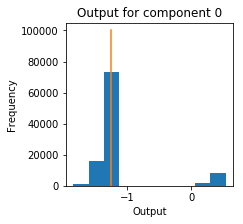

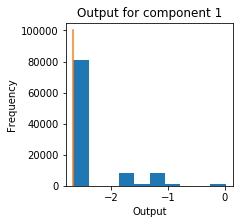

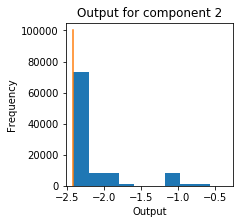

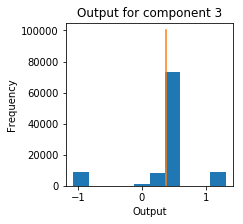

In [9]:
repetitions = 100000
np.random.seed(42)
for dropped, true, i in zip(zip(*experiment.model.predict(np.repeat(x, repetitions, axis = 0))), y1[0], range(layers[-1])):
    assert np.abs(np.mean(dropped) - true) / np.abs(true) < 0.5, "Mean value"
    plt.figure(figsize=(3,3))
    plt.title('Output for component %d' % i)
    plt.xlabel('Output')
    plt.ylabel('Frequency')
    plt.hist(dropped)
    plt.plot([true, true], [0, repetitions])
    plt.show()

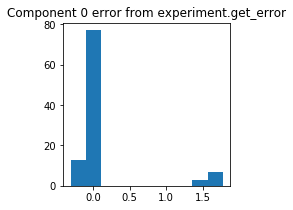

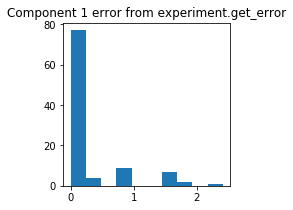

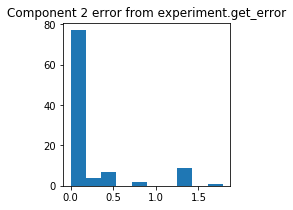

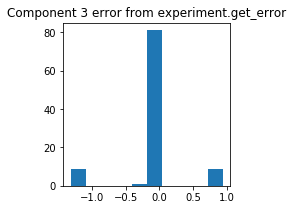

In [10]:
for i, component in enumerate(zip(*experiment.get_error(x[0]))):
    plt.figure(figsize = (3, 3))
    plt.title('Component %d error from experiment.get_error' % i)
    plt.hist(component)
    plt.show()

In [11]:
# get_wb test
assert np.allclose(np.vstack((experiment.W[0], experiment.B[0])), experiment.get_wb(0)), "get_wb"

# get_max_f test
assert np.max(experiment.get_wb(0)[0, :]) == experiment.get_max_f(0, lambda x : x[0]), "get_max_f"

In [12]:
# also works
#experiment.get_max_f_xy(0, lambda x, y: x[0] * y[1])

In [13]:
W1 = np.ones((3,2))
W2 = np.ones((2,1))
B1 = np.zeros(2)
B2 = np.zeros(1)
experiment = ConstantExperiment([3, 2, 1], 0.1, 0.3, [W1,W2], [B1,B2], do_print = True)
assert np.allclose(experiment.get_mean_std_error()[0], 0.2), "Mean"

Creating network for 3-dimensional input and 1-dimensional output, with 1 hidden layers


In [14]:
W1 = np.ones((4,3))
W2 = np.ones((3,2))
W3 = np.ones((2,1))
B1 = np.zeros(3)
B2 = np.zeros(2)
B3 = np.zeros(1)
experiment = ConstantExperiment([4, 3, 2, 1], 0.1, 0.3, [W1,W2,W3], [B1,B2,B3], do_print = True)
assert np.allclose(experiment.get_mean_std_error()[0], 0.2+9*18/1000.), "Mean"

Creating network for 4-dimensional input and 1-dimensional output, with 2 hidden layers


In [15]:
W1 = np.ones((4,3))
W2 = np.ones((3,2))
W3 = np.ones((2,1))
B1 = np.ones(3)
B2 = np.ones(2)
B3 = np.ones(1)
experiment = ConstantExperiment([4, 3, 2, 1], 0.1, 0.3, [W1,W2,W3], [B1,B2,B3], do_print = True)
assert np.allclose(experiment.get_mean_std_error()[0], 0.2+9*18/1000.), "Mean"

Creating network for 4-dimensional input and 1-dimensional output, with 2 hidden layers


In [16]:
W1 = np.ones((1,1))
W2 = np.ones((1,1))
B1 = np.zeros(1)
B2 = np.zeros(1)
experiment = ConstantExperiment([3, 2, 1], 0.1, 0.3, [W1, W2], [B1, B2], do_print = True)
assert experiment.get_mean_std_error()[0] == 0.1

Creating network for 3-dimensional input and 1-dimensional output, with 1 hidden layers
